In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
%matplotlib inline

In [3]:
df = pd.read_csv('Batting.csv')
df

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,Frank,Abercrombie,1850,1871,1,TRO,NaN,1,4,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,Bob,Addy,1842,1871,1,RC1,NaN,25,118,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,Art,Allison,1849,1871,1,CL1,NaN,29,137,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,Doug,Allison,1846,1871,1,WS3,NaN,27,133,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,Cap,Anson,1852,1871,1,RC1,NaN,25,120,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN
5,armstbo01,Robert,Armstrong,1850,1871,1,FW1,NaN,12,49,...,5.0,0.0,1.0,0,1.0,NaN,NaN,NaN,NaN,NaN
6,barkeal01,Al,Barker,1839,1871,1,RC1,NaN,1,4,...,2.0,0.0,0.0,1,0.0,NaN,NaN,NaN,NaN,NaN
7,barnero01,Ross,Barnes,1850,1871,1,BS1,NaN,31,157,...,34.0,11.0,6.0,13,1.0,NaN,NaN,NaN,NaN,NaN
8,barrebi01,Bill,Barrett,0,1871,1,FW1,NaN,1,5,...,1.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
9,barrofr01,Frank,Barrows,1844,1871,1,BS1,NaN,18,86,...,11.0,1.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN


#### Total games, rum,homeruns,hits doubles and triples from different leagues visualization (Barplots&Area)

In [17]:
dflg = df.groupby('lgID').agg({'H':sum,'2B':sum,'3B':sum,'G':sum,'R':sum,'HR':sum})

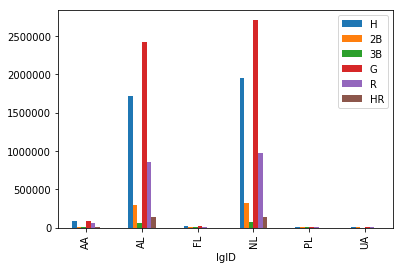

In [18]:
dflg.plot.bar()

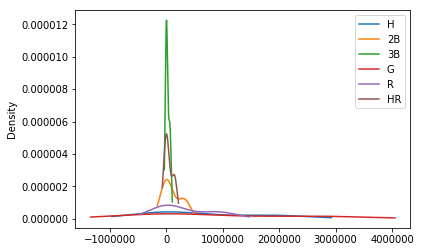

In [19]:
dflg.plot.kde()

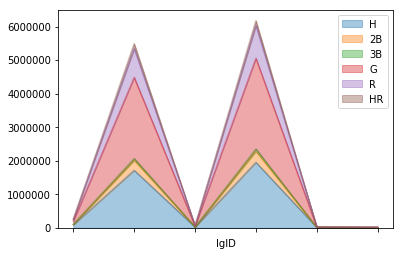

In [86]:
dflg.plot.area(alpha=0.4)

#### Total games, rum,homeruns,hits doubles and triples in different years visualization (PairGrid)

In [75]:
dfyear = df.groupby('yearID').agg({'H':sum,'2B':sum,'3B':sum,'G':sum,'R':sum,'HR':sum})

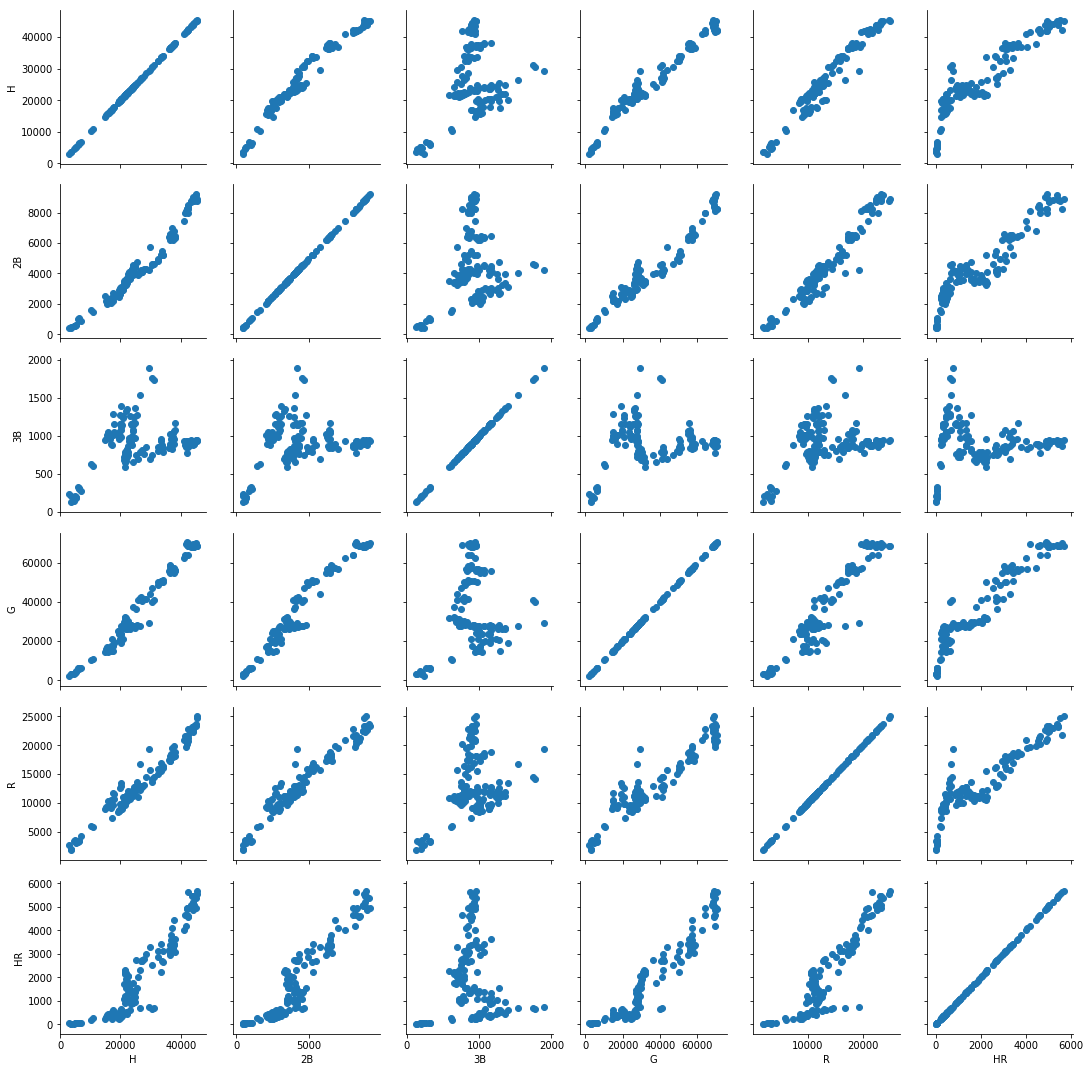

In [76]:
g = sns.PairGrid(dfyear)
g.map(plt.scatter)

E:\ANACONDA\lib\site-packages\matplotlib\contour.py:967: UserWarning:

The following kwargs were not used by contour: 'label', 'color'



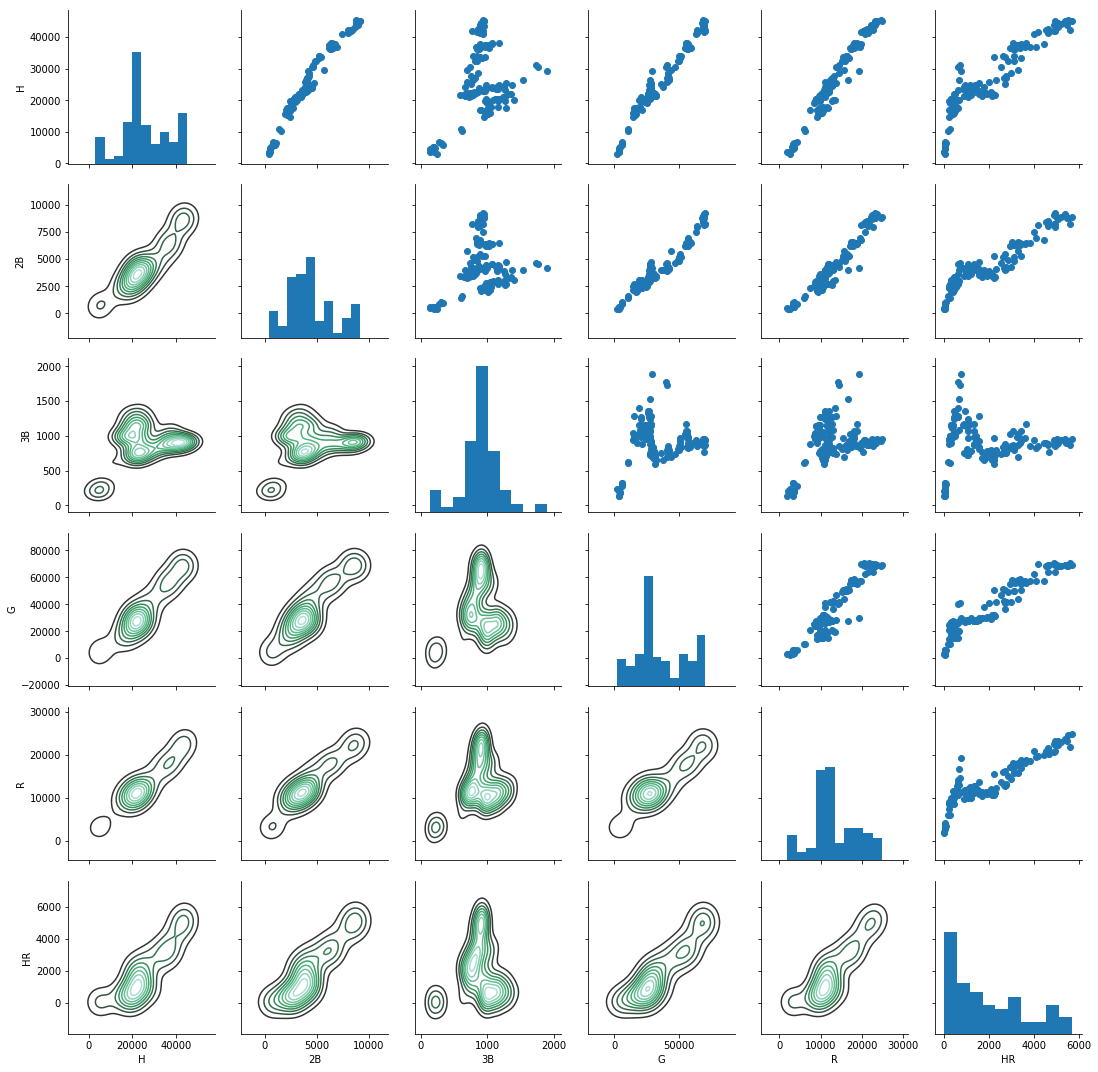

In [81]:
g = sns.PairGrid(dfyear)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

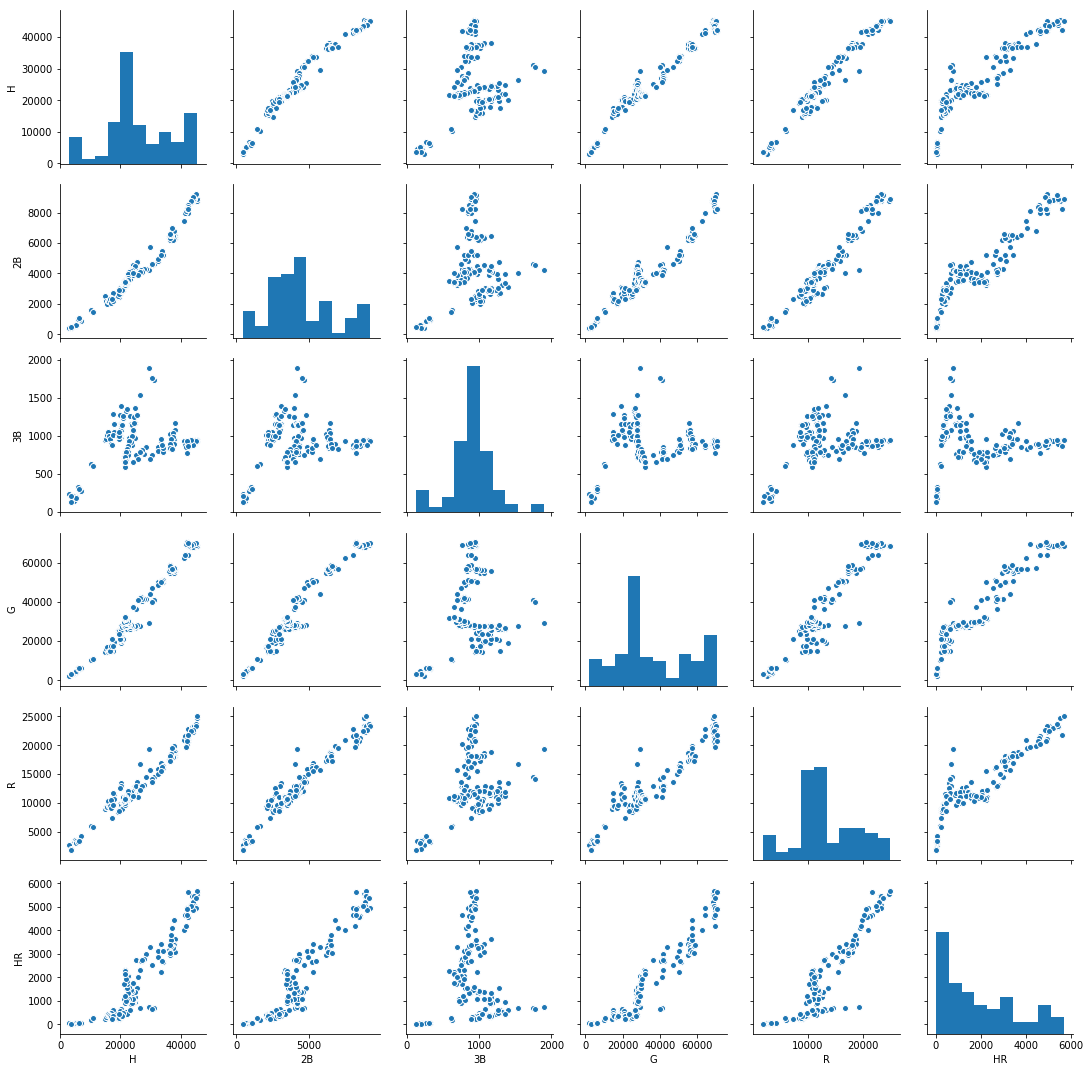

In [85]:
sns.pairplot(dfyear)

#### Total games relate with hits visualization 

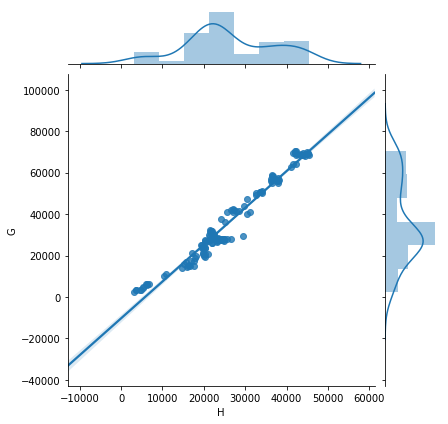

In [87]:
g = sns.JointGrid(x="H", y="G", data=dfyear)
g = g.plot(sns.regplot, sns.distplot)

#### visualize 1940s the hit times and games number from different leagues(Heatmap)

In [7]:
df1 = df[(df['yearID']>=1940) & (df['yearID']<=1949)].groupby(['lgID','yearID'],as_index = False).agg({'H':sum,'G':sum})
df1


,lgID,yearID,H,G
0,AL,1940,11674,13765
1,AL,1941,11492,13718
2,AL,1942,10785,13411
3,AL,1943,10522,13559
4,AL,1944,11114,13653
5,AL,1945,10634,13548
6,AL,1946,10793,14282
7,AL,1947,10739,14267
8,AL,1948,11212,14599
9,AL,1949,10961,14517


In [8]:
df1.pivot_table(values='H',index='lgID',columns='yearID')

yearID,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949
lgID,,,,,,,,,,
AL,11674,11492,10785,10522,11114,10634,10793,10739,11212,10961
NL,11328,11039,10391,10945,11193,11343,10762,11264,11022,11207


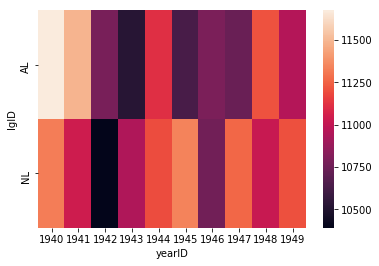

In [9]:
pvflights = df1.pivot_table(values='H',index='lgID',columns='yearID')
sns.heatmap(pvflights)

#### visualize 1940s the hit times from different leagues

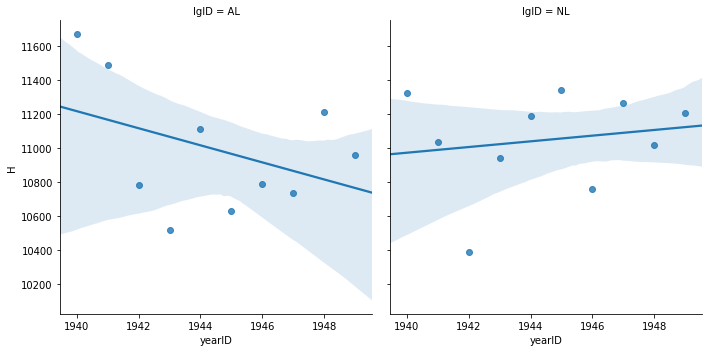

In [10]:
sns.lmplot(x='yearID',y='H',data=df1,col='lgID')

#### visualize 1940s the number of games from different leagues

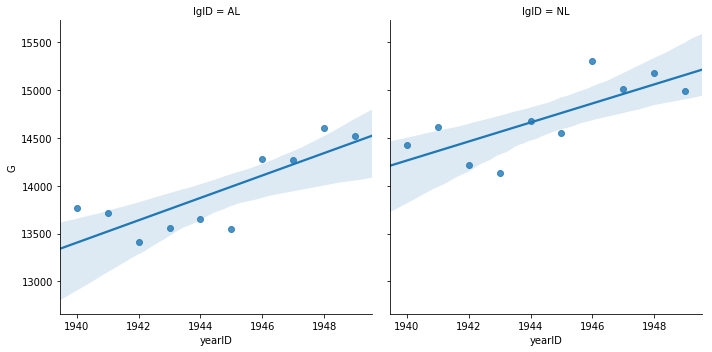

In [11]:
sns.lmplot(x='yearID',y='G',data=df1,col='lgID')